## Santander Customer Satisfaction

### Kaggle: https://www.kaggle.com/c/santander-customer-satisfaction/data

In [237]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [201]:
# Loading sample dataset (sample of 10.000 rows)
traindata = pd.read_csv('Santander_sample.csv')

In [202]:
# Dataset structure
print(traindata.shape)

# This dataset has 10.000 observations and 371 variables
# The column TARGET is the one we will try to predict

(10000, 371)


In [203]:
# Top 5 rows
traindata.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [204]:
# 5 Last rows
traindata.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.74,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.09,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.88,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.77,0
9999,20074,2,40,585.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55804.41,0


In [205]:
# Dataframe statistics
traindata.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,10037.371400,-697.290500,33.286200,103.577532,74.301786,127.464021,6.700176,11.824926,0.609000,0.924000,...,3.377190,1.270416,3.806706,3.011112,15.324084,2.714991,27.227514,20.009280,1.169056e+05,0.038800
std,5814.748024,26449.620836,12.946129,2373.057243,342.390527,579.622179,149.285046,239.343336,28.580077,41.718824,...,210.980982,80.382604,221.976668,168.737633,600.931851,196.281397,874.238934,649.869051,1.589653e+05,0.193128
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.000000
25%,5011.500000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.767771e+04,0.000000
50%,9987.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.068753e+05,0.000000
75%,15026.250000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201209e+05,0.000000
max,20074.000000,235.000000,102.000000,210000.000000,7904.220000,15182.460000,7904.220000,11073.570000,1800.000000,3000.000000,...,15265.950000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,9.055272e+06,1.000000


In [206]:
# Dataframe datatypes
traindata.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [207]:
traindata.nunique()

ID                         10000
var3                          68
var15                         89
imp_ent_var16_ult1           160
imp_op_var39_comer_ult1     1205
                           ...  
saldo_medio_var44_hace3        6
saldo_medio_var44_ult1        19
saldo_medio_var44_ult3        19
var38                       7960
TARGET                         2
Length: 371, dtype: int64

In [208]:
# Target distribution
traindata.groupby('TARGET').size()

# The dataset is imbalaced, there are more satisfied customers (0) than unsatisfied (1)

TARGET
0    9612
1     388
dtype: int64

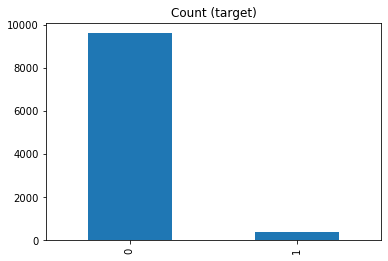

In [209]:
target_count = traindata.TARGET.value_counts()
target_count.plot(kind='bar', title='Count (target)');

In [210]:
# Verificando a correlação entre as variáveis
corr = traindata.corr(method = 'pearson')
corr

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.002846,-0.002679,0.025045,0.007413,0.003251,0.002660,-0.005608,0.009758,0.010021,...,-0.013220,-0.008712,-0.011174,-0.010427,-0.010669,-0.007283,-0.008595,-0.008657,-0.007914,-0.013538
var3,-0.002846,1.000000,-0.007258,0.001157,0.005783,0.005883,0.001211,0.001369,0.000563,0.000586,...,0.000434,0.000442,0.000464,0.000485,0.000709,0.000411,0.000849,0.000841,-0.000066,0.005312
var15,-0.002679,-0.007258,1.000000,0.033298,0.112041,0.117091,0.060546,0.071889,0.015706,0.013459,...,0.022834,0.021089,0.023337,0.023729,0.026193,0.018280,0.030226,0.029057,0.002010,0.110678
imp_ent_var16_ult1,0.025045,0.001157,0.033298,1.000000,0.022729,0.019085,0.011131,0.008149,0.003582,0.008125,...,-0.000699,-0.000690,-0.000645,-0.000643,-0.001113,-0.000604,-0.001359,-0.001344,0.000796,0.000212
imp_op_var39_comer_ult1,0.007413,0.005783,0.112041,0.022729,1.000000,0.877528,0.475310,0.421565,0.074839,0.100495,...,0.015432,0.039172,0.022054,0.029143,0.006858,0.000325,0.004799,0.003938,0.002213,0.026247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.007283,0.000411,0.018280,-0.000604,0.000325,0.000958,-0.000621,-0.000683,-0.000295,-0.000306,...,-0.000221,-0.000219,-0.000237,-0.000247,0.810665,1.000000,0.595163,0.617328,0.015887,-0.002779
saldo_medio_var44_ult1,-0.008595,0.000849,0.030226,-0.001359,0.004799,0.005448,-0.001398,-0.001539,-0.000664,-0.000690,...,-0.000499,-0.000492,-0.000534,-0.000556,0.902203,0.595163,1.000000,0.991274,0.006543,-0.006258
saldo_medio_var44_ult3,-0.008657,0.000841,0.029057,-0.001344,0.003938,0.004291,-0.001382,-0.001521,-0.000656,-0.000682,...,-0.000493,-0.000487,-0.000528,-0.000549,0.919532,0.617328,0.991274,1.000000,0.007447,-0.006186
var38,-0.007914,-0.000066,0.002010,0.000796,0.002213,-0.000029,0.005327,0.002510,-0.002082,-0.002140,...,0.005719,0.001661,0.005284,0.004938,0.011091,0.015887,0.006543,0.007447,1.000000,-0.027689


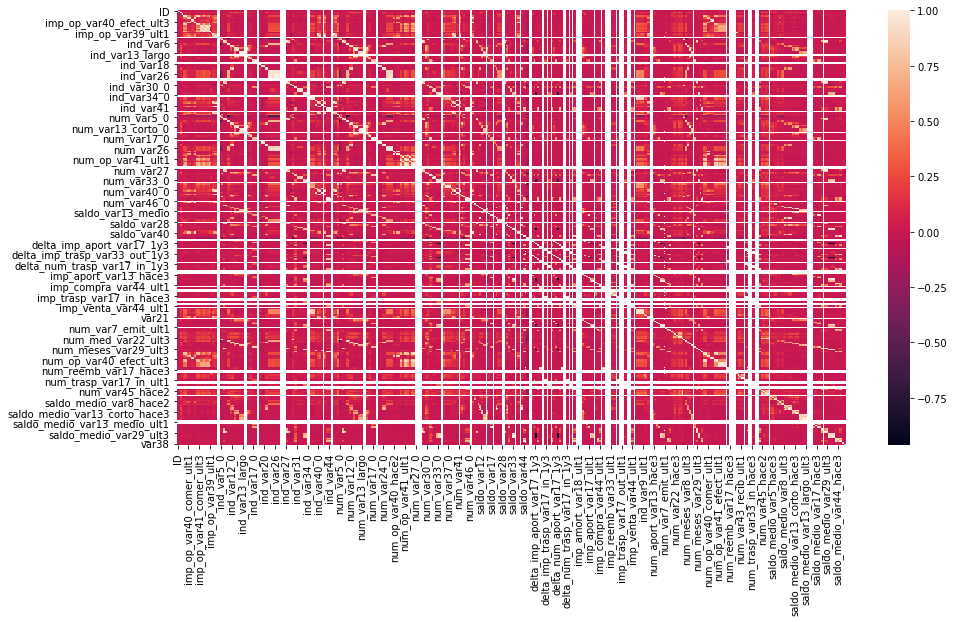

In [211]:
plt.figure(figsize = (15,8))
sns.heatmap(corr)

#### Since there are too many variables, it is almost impossible to see the correlation between variables

In [212]:
# Removing constant columns, that have standard deviation = 0. A zero standard deviation can only be possible when all the 
# values of a variable are the same (all equal to the mean). In this case, those variables have no discriminative power so 
# they can be removed from the analysis.
vars_remove = []
for col in traindata.columns:
    if traindata[col].std() == 0:
        vars_remove.append(col)

print(vars_remove)

['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 

In [213]:
traindata.drop(remove, axis=1, inplace=True)
traindata.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [214]:
# Removing duplicate columns
var_dup_remove = []
c = traindata.columns
for i in range(len(c)-1):
    v = traindata[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,traindata[c[j]].values):
            var_dup_remove.append(c[j])
            
print(var_dup_remove)

['ind_var40_0', 'ind_var40', 'ind_var39', 'ind_var29_0', 'ind_var29', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var37', 'ind_var39', 'ind_var44', 'num_var40_0', 'num_var40', 'num_var39', 'num_var29_0', 'num_var29', 'num_var26', 'num_var25', 'num_var32', 'num_var37', 'num_var39', 'num_var44', 'saldo_var40', 'saldo_var29', 'delta_num_aport_var17_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_venta_var44_1y3']


In [215]:
traindata.drop(var_dup_remove, axis=1, inplace=True)
traindata.shape

(10000, 259)

In [216]:
# Removing ID column
traindata.drop('ID', axis=1, inplace=True)

In [217]:
traindata.shape

(10000, 258)

In [168]:
# selecting only the variables that have correlation bigger than 0.9
#cormat = traindata.where(np.triu(np.ones(traindata.shape), k=1).astype(np.bool))
#cormat   

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,NaN,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,NaN,NaN,NaN,NaN,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
#var_drop = [column for column in cormat.columns if any(cormat[column] > 0.9)]
#print(var_drop)

['var15', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var20_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var25_0', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var37_cte', 'ind_var37_0', 'ind_var39_0', 'ind_var41_0', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13', 'num_var17_0', 'num_var17', 'num_var20_0', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var25_0', 'num_op_var40_hace2', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_

In [170]:
#var_drop.remove('TARGET')
#print(var_drop)

['var15', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var20_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var25_0', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var37_cte', 'ind_var37_0', 'ind_var39_0', 'ind_var41_0', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13', 'num_var17_0', 'num_var17', 'num_var20_0', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var25_0', 'num_op_var40_hace2', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_

In [218]:
#traindata.drop(var_drop, axis=1, inplace=True)
#traindata.shape

(10000, 258)

In [219]:
# Separating X and Y, and normalizing dataset using scaler
traindata.iloc[:, :-1] = scaler.fit_transform(traindata.iloc[:, :-1])

X = traindata.iloc[:, :-1]
Y = traindata.iloc[:, -1]

In [220]:
traindata.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.999767,0.185567,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003175,0
1,0.999767,0.298969,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004289,0
2,0.999767,0.185567,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006285,0
3,0.999767,0.329897,0.0,0.02467,0.012844,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005918,0
4,0.999767,0.350515,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011811,0


### Testing our model using 150 variables

In [221]:
# Feature selection using SelectKBest
best_var = SelectKBest(score_func = chi2, k = 150)

fit = best_var.fit(X, Y)

features = fit.transform(X)

In [240]:
# Resultados
print('\nOriginal number of features:', traindata.shape[1])
print('\nReduced number of features:', features.shape[1])
print('\nSelected Features: \n\n', best_var.get_support(indices=True))


Original number of features: 258

Reduced number of features: 150

Selected Features: 

 [  1   3   4   7   8   9  10  11  12  13  14  15  16  17  19  20  21  22
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  40  41  42  43
  44  45  46  47  49  50  51  52  53  60  61  62  63  65  68  69  70  71
  72  73  74  75  76  77  78  79  82  83  84  85  86  87  92  94  95  96
  98  99 100 101 102 103 107 108 113 114 115 119 120 121 122 126 127 128
 129 134 135 136 137 140 144 145 147 148 159 163 164 165 166 167 169 171
 177 179 180 181 183 184 185 187 188 189 190 191 192 196 197 198 201 202
 203 204 205 206 207 208 211 213 219 221 222 224 229 230 231 232 233 234
 235 236 237 238 239 240]


In [223]:
# Get columns to keep and create new dataframe with those only
cols = best_var.get_support(indices=True)
features_df_new = traindata.iloc[:,cols]

features_df_new

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3
0,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.298969,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000667,0.000415,0.000667,0.000544,0.0,0.0,0.0,0.0
2,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.329897,0.02467,0.012844,0.0,0.0,0.0,0.024737,0.012844,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.350515,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.071117,0.093549,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.484536,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9996,0.185567,0.00646,0.003363,0.0,0.0,0.0,0.006477,0.003363,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9997,0.329897,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9998,0.195876,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [224]:
newfeat = pd.concat([features_df_new.reset_index(drop=True), traindata['TARGET']], axis=1)

newfeat

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,TARGET
0,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
1,0.298969,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000667,0.000415,0.000667,0.000544,0.0,0.0,0.0,0.0,0
2,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
3,0.329897,0.02467,0.012844,0.0,0.0,0.0,0.024737,0.012844,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
4,0.350515,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.093549,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.484536,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
9996,0.185567,0.00646,0.003363,0.0,0.0,0.0,0.006477,0.003363,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
9997,0.329897,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
9998,0.195876,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0


In [225]:
# Correlation between most important variables
corr = newfeat.corr()
corr

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,TARGET
var15,1.000000,0.112041,0.117091,0.015706,0.013459,0.059185,0.097245,0.098846,0.088642,0.092139,...,0.212683,0.190301,0.103549,0.213576,0.209481,0.136270,0.096952,0.150322,0.149401,0.110678
imp_op_var39_comer_ult1,0.112041,1.000000,0.877528,0.074839,0.100495,0.424178,0.900153,0.795528,0.356256,0.389085,...,0.011915,0.010060,0.061918,0.005758,0.006843,0.002588,0.005049,-0.000159,-0.000359,0.026247
imp_op_var39_comer_ult3,0.117091,0.877528,1.000000,0.084169,0.110357,0.378502,0.781736,0.911160,0.325890,0.411933,...,0.004422,0.004576,0.041846,-0.000381,-0.000114,0.005343,0.003412,0.002416,0.001650,0.012779
imp_op_var40_efect_ult1,0.015706,0.074839,0.084169,1.000000,0.867514,0.082597,0.033496,0.031498,0.104408,0.107016,...,-0.003033,-0.002905,-0.001713,-0.003235,-0.003178,-0.001378,-0.000956,-0.001500,-0.001493,0.058773
imp_op_var40_efect_ult3,0.013459,0.100495,0.110357,0.867514,1.000000,0.149216,0.060898,0.067294,0.136939,0.159396,...,-0.003152,-0.003019,-0.001780,-0.003362,-0.003304,-0.001432,-0.000993,-0.001560,-0.001552,0.065930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var13_largo_hace2,0.136270,0.002588,0.005343,-0.001378,-0.001432,0.019687,-0.004690,-0.007087,-0.005863,-0.005050,...,-0.005158,-0.007165,-0.004349,-0.008288,-0.008291,1.000000,0.799016,0.962223,0.958540,-0.012992
saldo_medio_var13_largo_hace3,0.096952,0.005049,0.003412,-0.000956,-0.000993,0.000408,0.004477,-0.001221,-0.003016,-0.001422,...,-0.001218,-0.006003,-0.003530,-0.006715,-0.006605,0.799016,1.000000,0.739675,0.763580,-0.009011
saldo_medio_var13_largo_ult1,0.150322,-0.000159,0.002416,-0.001500,-0.001560,0.017782,-0.007006,-0.009175,-0.007170,-0.006673,...,-0.006163,-0.005586,-0.004706,-0.005584,-0.006071,0.962223,0.739675,1.000000,0.992979,-0.014146
saldo_medio_var13_largo_ult3,0.149401,-0.000359,0.001650,-0.001493,-0.001552,0.015124,-0.006332,-0.008907,-0.006483,-0.006003,...,-0.006018,-0.005622,-0.004689,-0.006142,-0.006564,0.958540,0.763580,0.992979,1.000000,-0.014080


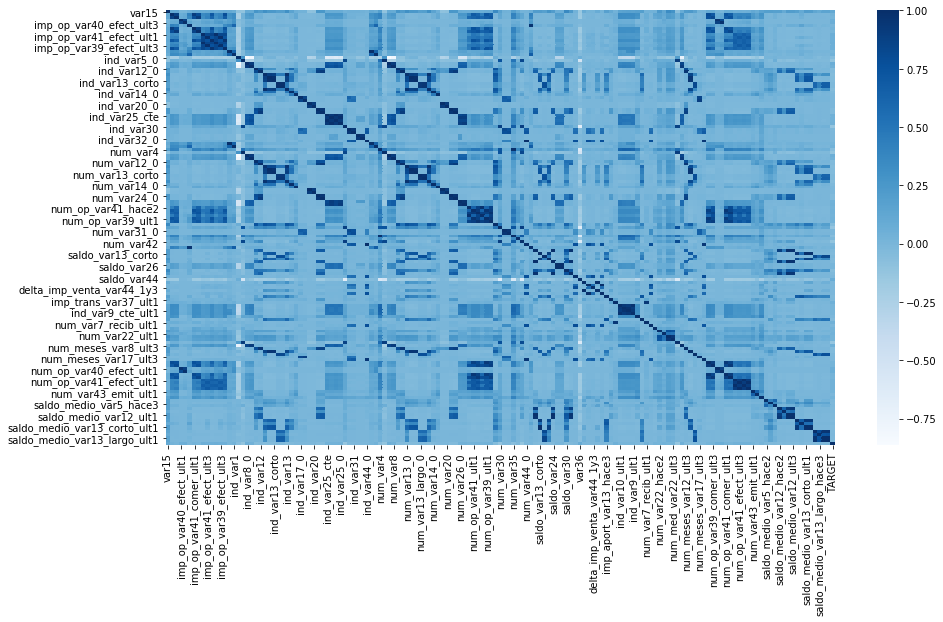

In [226]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap="Blues")

In [228]:
# Separating the new variables and target
X = newfeat.iloc[:, :-1]
Y = newfeat.iloc[:,-1]

In [229]:
X.head()

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3
0,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.298969,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000667,0.000415,0.000667,0.000544,0.0,0.0,0.0,0.0
2,0.185567,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.329897,0.02467,0.012844,0.0,0.0,0.0,0.024737,0.012844,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.350515,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.071117,0.093549,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [230]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [231]:
# Defining number of folds
num_folds = 15
seed = 10

# Separating data in folds
kfold = KFold(num_folds, True, random_state = seed)

In [247]:
# Evaluating KNN algorithm
model = KNeighborsClassifier()

# Cross Validation using AUC
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print 
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 60.714


In [248]:
# Evaluating NaiveBayes 
model = GaussianNB()

# Cross Validation using AUC
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 54.283


In [249]:
# Evaluating SVM
model = SVC()

# Cross Validation using AUC
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 61.210


In [250]:
# Evaluating GradientBoosting
model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)

# Cross Validation using AUC
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 82.429


In [251]:
# Evaluating XGBoost
model = xgb.XGBClassifier(n_estimators=100, learning_rate = 0.1, nthread=1, max_depth = 1)

# Cross Validation using AUC
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 82.262


### Testing our models using 100 variables

In [241]:
# Feature selection using SelectKBest
best_var1 = SelectKBest(score_func = chi2, k = 100)

fit1 = best_var1.fit(X, Y)

features1 = fit1.transform(X)

# Get columns to keep and create new dataframe with those only
cols1 = best_var1.get_support(indices=True)
features_df_new1 = traindata.iloc[:,cols1]

# Joining variables + target
newfeat1 = pd.concat([features_df_new1.reset_index(drop=True), traindata['TARGET']], axis=1)

newfeat1.head()

X1 = newfeat1.iloc[:, :-1]
Y1 = newfeat1.iloc[:,-1]

In [252]:
# Evaluating KNN algorithm
model = KNeighborsClassifier()

# Cross Validation using AUC
result = cross_val_score(model, X1, Y1, cv = kfold, scoring = 'roc_auc')

# Print 
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 65.123


In [253]:
# Evaluating NaiveBayes 
model = GaussianNB()

# Cross Validation using AUC
result = cross_val_score(model, X1, Y1, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 53.564


In [254]:
# Evaluating SVM
model = SVC()

# Cross Validation using AUC
result = cross_val_score(model, X1, Y1, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 59.407


In [255]:
# Evaluating GradientBoosting
model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)

# Cross Validation using AUC
result = cross_val_score(model, X1, Y1, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 82.156


In [256]:
# Evaluating XGBoost
model = xgb.XGBClassifier(n_estimators=100, learning_rate = 0.1, nthread=1, max_depth = 1)

# Cross Validation using AUC
result = cross_val_score(model, X1, Y1, cv = kfold, scoring = 'roc_auc')

# Print
print("Accuracy: %.3f" % (result.mean() * 100))

Accuracy: 82.102


### Conclusions

#### The metric used to evaluate the models was ROC AUC.
#### The only model that had a better performance with 100 variables than with 150 variables was the KNN algorithm.
#### To get a better accuracy, we could try different combinations of hyperparameters for each algorithm used, select different 
#### amount of best variables or try different pre-processing techniques.